# HW 3: CNN for Image and Text Classification

In this assignment, we'll have two experiments:
- Image classification: Diagnose COVID-19 by CT images
- Text classification: Let's redo the news classification task of HW #2 using CNN

## Q1: Diagnose COVID-19 by CT images (7 points)

Please first download the CT images
- `COVID-19 CT scans`: https://github.com/UCSD-AI4H/COVID-CT/blob/master/Images-processed/CT_COVID.zip. In total, there are 349 images.
- `Non-COVID-19 Scans`: https://github.com/UCSD-AI4H/COVID-CT/blob/master/Images-processed/CT_NonCOVID.zip. There are 397 images in total.

This dataset may be a little small for CNN models. Let's just use this dataset to practice CNN models.

### Q1.1. Data Preprocessing (1 point)

- Refer to CNN labs to read the image files and create datasets.
- For each class, use 60% images for training, 20% for validation, and 20% for testing. The split has been created for you.
- Create a Dataset class so that you can preprocess images and generate mini-batches for training. Since the CT scans are grayscale (only 1 channel), you can transform all images to grayscale. 

In [ ]:
import os
import glob
import sklearn

import numpy as np

from PIL import Image

# add your import here

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
# set random seed to so that work can be replicated

random_seed = 124
np.random.seed(random_seed)

torch.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True

In [ ]:
# load data and split data to train, evaluation and test

pos_files = [Image.open(f) for f in glob.glob(os.path.join(cur_path, 'COVID/CT_COVID','*.*'))]
neg_files = [Image.open(f) for f in  glob.glob(os.path.join(cur_path, 'COVID/CT_NonCOVID','*.*'))]

images = pos_files + neg_files
labels = np.array([1]*len(pos_files)+[0]*len(neg_files))

images_tv, images_test, y_tv, y_test  = train_test_split(images, labels, shuffle=True, test_size=0.2, random_state=123)
images_train, images_val, y_train, y_val  = train_test_split(images_tv, y_tv, shuffle=True, test_size=0.25, random_state=123)

In [ ]:
print(len(y_train), len(y_val), len(y_test))

print(y_train.sum(), y_val.sum(), y_test.sum())

447 149 150
207 71 71


In [ ]:
# create Dataset class

class CT_Dataset(Dataset):
    
    # add your code here
    

### Q1.2. Build Model (2 points)

- Create a CNN models with appropriate layers of `Convolution`, `MaxPooling2D`, and `Dense` layers. Use appropriate activation functions for these layers.
- Since this dataset is small, it may be easily get overfitted. Leverage `Dropout` or other regularization techniques to fight overfitting
- Configure your model with appropriate optimizer and loss function.

In [ ]:
# define CNN mode

class Convnet(nn.Module):
    
    # add your code here

### Q1.3. Fit your model (2 points)

- Define a function to train the model until it converges. You should use the `evaluation dataset` to control the training process such that the model is not overfitted.
- Plot the loss and accuracy of the model over the training and validation data
- Test the model using `test dataset` and show the test accuracy. If everything goes well, the test accuracy should be 65% or higher

In [ ]:
# define training function

def train_model(model, train_dataset, eval_dataset, test_dataset, device, 
                lr=0.0001, epochs=30, batch_size=32):
    
    
    
   # add your code here

In [ ]:
# Train the CNN model


# add your code here 

Training Start
Epoch:1 / 100, train loss:0.7500,        train_acc:0.5112, valid loss:0.6817 valid acc:0.4875
model saved!
Epoch:2 / 100, train loss:0.6715,        train_acc:0.5558, valid loss:0.6729 valid acc:0.5062
model saved!
Epoch:3 / 100, train loss:0.6540,        train_acc:0.6272, valid loss:0.6395 valid acc:0.5875
model saved!
Epoch:4 / 100, train loss:0.6264,        train_acc:0.6473, valid loss:0.6306 valid acc:0.5875
Epoch:5 / 100, train loss:0.6156,        train_acc:0.6094, valid loss:0.6142 valid acc:0.6062
model saved!
Epoch:6 / 100, train loss:0.6005,        train_acc:0.6786, valid loss:0.6124 valid acc:0.6000
Epoch:7 / 100, train loss:0.5706,        train_acc:0.6897, valid loss:0.5780 valid acc:0.6375
model saved!
Epoch:8 / 100, train loss:0.5539,        train_acc:0.6942, valid loss:0.5727 valid acc:0.6312
Epoch:9 / 100, train loss:0.5308,        train_acc:0.7299, valid loss:0.5657 valid acc:0.6375
Epoch:10 / 100, train loss:0.5298,        train_acc:0.7143, valid loss:0.5

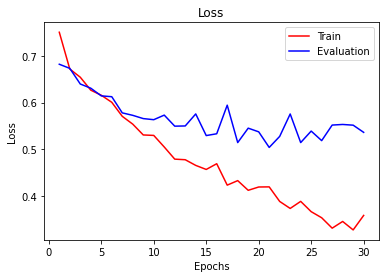

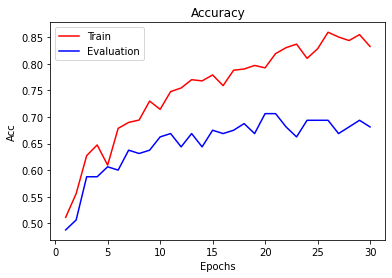

In [ ]:
# plot training curves

epochs = range(1, len(hista['train_loss']) + 1)

plt.plot(epochs, hista['train_loss'], 'r-', label='Train')
plt.plot(epochs, hista['eval_loss'], 'b-', label='Evaluation')

plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, hista['train_acc'], 'r-', label='Train')
plt.plot(epochs, hista['eval_acc'], 'b-', label='Evaluation')

plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

### Q1.4. Using data augmentation (2 points)

Since we have a small dataset, a thought is that perhaps we can improve the performance by data augmentation


- Modify your Dataset class to add appropriate data augumentation. Check the augmentation techniques here: https://pytorch.org/vision/stable/transforms.html
- Try 2 augmentation techniques to see if this can improve model performance on testing
- Note that CT scans usually are well positioned. Just try minor adjustment without unrealistic changes to images. 

- Repeat Task 1.3 with the augmented data 

- For this CT image dataset, it is not guranteed that augmentation may help. Just give a try and anazye why your augmentation techniques may (or may not) help.

In [ ]:
# add augmentation

# train the model with augmented data


## Q2: News Classification by CNN (3 points)

In HW #2, You have used linear layers to classify text. This time, let's use CNN model to see if the performance can be improved.



### Q2.1 Data Processing (1 point)

Since the embedding layer expects a sentences with uniform length, you need to pad or truncate the sentences to the same length. Properly decide the maximum length of the sentence so that most of sentences are kept intact after processing. However, do not set the maximum length too big, which reduces the computational efficiency.

In [ ]:
import keras
from keras.datasets import reuters
import pandas as pd

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# show the sizes training/testing samples 
len(train_data)
len(test_data)

# show an example from the training dataset
print(train_data[10])

# retrieve the mapping from words to indices
word_index = reuters.get_word_index()

# reverse mapping
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index[i - 3] for i in train_data[0] if (i-3) in reverse_word_index])

decoded_newswire

2121728/2110848 [==============================] - 0s 0us/step
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
565248/550378 [==============================] - 0s 0us/step


'said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
# distribution of labels

pd.Series(train_labels).value_counts()

3     3159
4     1949
19     549
16     444
1      432
11     390
20     269
13     172
8      139
10     124
9      101
21     100
25      92
2       74
18      66
24      62
0       55
34      50
36      49
12      49
28      48
6       48
30      45
23      41
31      39
17      39
40      36
32      32
41      30
14      26
39      24
26      24
43      21
15      20
29      19
37      19
38      19
45      18
5       17
7       16
27      15
22      15
42      13
44      12
33      11
35      10
dtype: int64

In [1]:
# Pad or truncate sentences so that they have uniform length

# add your code here

In [ ]:
# add your code to create Dataset class

class news_dataset(Dataset):
   
    # add your code here

### Q2.2 Define the model (2 points)

- Your model should contain the follow layers:
    - Embedding (Note, you are not required to use pretrained word vector in the embedding layer in this task)
    - Convolution
    - MaxPool
    - Flatten, Concatenate, Dropout if needed
    - Dense


- Carefully choose the following hyperparameters:
  - Max. sentence length
  - Embedding dimension
  - Filter sizes and number of filters 
- Use appropriate activate functions for all layers

In [ ]:
class cnn_text(nn.Module):

   # add your code here

### Q2.3. Train the model

- Fit the model, plot the training curve on training and testing datasets

- You can certainly reuse your training function from HW #2.

In [ ]:
def train_model(model, train_dataset, test_dataset, device, 
                lr=0.0002, epochs=30, batch_size=64):
    
    # add your code here

In [ ]:
# add code to train the model

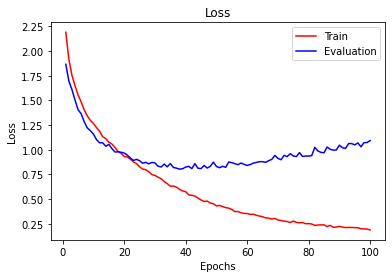

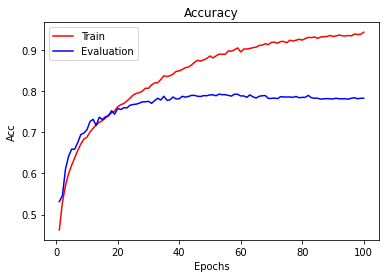

In [ ]:
# show training curve

epochs = range(1, len(hist['train_loss']) + 1)

plt.plot(epochs, hist['train_loss'], 'r-', label='Train')
plt.plot(epochs, hist['test_loss'], 'b-', label='Evaluation')

plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, hist['train_acc'], 'r-', label='Train')
plt.plot(epochs, hist['test_acc'], 'b-', label='Evaluation')

plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

### Q2.4 (Bonus) Pretrained Wore Vectors (2 points)

It's a common practice to use pretrained word vectors to initialize the embedding layer paramters and then fine tune (or freeze) the embedding layer during model training.

- Train word vector by yourself or find pretrained word vectors
- Initialize the embedding layer with the word vectors
- You can freeze the embedding layer or fine tune the layer
- Fit the model to see what strategy can further improve the training performance
- You're expected to show at least 1% improvement from Q2.3. in terms of test accuracy.